In [54]:
import pandas as pd
import os # use this to access your environment variables
import requests # this will be used to call the APIs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [55]:
#loading csv's from previous sections
fs_data = pd.read_csv("fs_df.csv")
ylp_data = pd.read_csv("ylp_df.csv")
tor_stations = pd.read_csv("tor_stations_sample.csv")

In [56]:
#confirmed same number of columns
print(fs_data.shape)
fs_data.columns
#fix column name to match
pd.DataFrame(fs_data)
fs_data.rename(columns={'poi_name': 'name'}, inplace=True)
fs_data.columns

(1991, 10)


Index(['closest bike station id', 'poi_id', 'name', 'address', 'distance',
       'longitude', 'latitude', 'categories', 'rating', 'price'],
      dtype='object')

In [57]:
ylp_data.head()

,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price
0,dcbcf9c681fbd3e77dfbea6df0e070bc,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,18 Duncan Street,348.204192,-79.388720,43.647840,['Thai'],4.5,$$
1,dcbcf9c681fbd3e77dfbea6df0e070bc,Yl2TN9c23ZGLUBSD9ks5Uw,Byblos,11 Duncan Street,290.701203,-79.388123,43.647546,"['Mediterranean', 'Middle Eastern']",4.5,$$$$
2,dcbcf9c681fbd3e77dfbea6df0e070bc,jGO4T6rGX3EIOwOtg4bZqg,Lobster Burger Bar,214 King Street W,209.383312,-79.386768,43.647443,"['Bars', 'Seafood', 'Burgers']",4.0,$$
3,dcbcf9c681fbd3e77dfbea6df0e070bc,ocLnCE2E29j-CoBQj1yaSA,Cafe Landwer - Adelaide & University,165 University Avenue,325.377024,-79.384910,43.648750,"['Cafes', 'Breakfast & Brunch', 'Mediterranean']",4.0,$$
4,dcbcf9c681fbd3e77dfbea6df0e070bc,JMiaNitMzMbJm6Kh0RbT5A,Canoe,66 Wellington Street W,285.381498,-79.382159,43.646954,['Canadian (New)'],4.0,$$$$


In [58]:
print(ylp_data.shape)
ylp_data.columns
#multiple ylp ratings by 2 to match foursquare scale
ylp_data['rating'] = ylp_data['rating'] * 2 

ylp_data.head()

(1985, 10)


,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price
0,dcbcf9c681fbd3e77dfbea6df0e070bc,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,18 Duncan Street,348.204192,-79.388720,43.647840,['Thai'],9.0,$$
1,dcbcf9c681fbd3e77dfbea6df0e070bc,Yl2TN9c23ZGLUBSD9ks5Uw,Byblos,11 Duncan Street,290.701203,-79.388123,43.647546,"['Mediterranean', 'Middle Eastern']",9.0,$$$$
2,dcbcf9c681fbd3e77dfbea6df0e070bc,jGO4T6rGX3EIOwOtg4bZqg,Lobster Burger Bar,214 King Street W,209.383312,-79.386768,43.647443,"['Bars', 'Seafood', 'Burgers']",8.0,$$
3,dcbcf9c681fbd3e77dfbea6df0e070bc,ocLnCE2E29j-CoBQj1yaSA,Cafe Landwer - Adelaide & University,165 University Avenue,325.377024,-79.384910,43.648750,"['Cafes', 'Breakfast & Brunch', 'Mediterranean']",8.0,$$
4,dcbcf9c681fbd3e77dfbea6df0e070bc,JMiaNitMzMbJm6Kh0RbT5A,Canoe,66 Wellington Street W,285.381498,-79.382159,43.646954,['Canadian (New)'],8.0,$$$$


In [59]:
#can concat both tables along columns
data = pd.concat([ylp_data, fs_data], axis=0).reset_index(drop=True)
data.dtypes

closest bike station id     object
poi_id                      object
name                        object
address                     object
distance                   float64
longitude                  float64
latitude                   float64
categories                  object
rating                     float64
price                       object
dtype: object

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closest bike station id  3976 non-null   object 
 1   poi_id                   3976 non-null   object 
 2   name                     3976 non-null   object 
 3   address                  3967 non-null   object 
 4   distance                 3976 non-null   float64
 5   longitude                3976 non-null   float64
 6   latitude                 3976 non-null   float64
 7   categories               3976 non-null   object 
 8   rating                   3787 non-null   float64
 9   price                    3087 non-null   object 
dtypes: float64(4), object(6)
memory usage: 310.8+ KB


In [61]:
#drop nulls for address, price, rating
data_clean = data.dropna(subset=['address', 'price', 'rating']).reset_index(drop=True)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closest bike station id  2991 non-null   object 
 1   poi_id                   2991 non-null   object 
 2   name                     2991 non-null   object 
 3   address                  2991 non-null   object 
 4   distance                 2991 non-null   float64
 5   longitude                2991 non-null   float64
 6   latitude                 2991 non-null   float64
 7   categories               2991 non-null   object 
 8   rating                   2991 non-null   float64
 9   price                    2991 non-null   object 
dtypes: float64(4), object(6)
memory usage: 233.8+ KB


In [62]:
data_clean.head()

,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price
0,dcbcf9c681fbd3e77dfbea6df0e070bc,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,18 Duncan Street,348.204192,-79.388720,43.647840,['Thai'],9.0,$$
1,dcbcf9c681fbd3e77dfbea6df0e070bc,Yl2TN9c23ZGLUBSD9ks5Uw,Byblos,11 Duncan Street,290.701203,-79.388123,43.647546,"['Mediterranean', 'Middle Eastern']",9.0,$$$$
2,dcbcf9c681fbd3e77dfbea6df0e070bc,jGO4T6rGX3EIOwOtg4bZqg,Lobster Burger Bar,214 King Street W,209.383312,-79.386768,43.647443,"['Bars', 'Seafood', 'Burgers']",8.0,$$
3,dcbcf9c681fbd3e77dfbea6df0e070bc,ocLnCE2E29j-CoBQj1yaSA,Cafe Landwer - Adelaide & University,165 University Avenue,325.377024,-79.384910,43.648750,"['Cafes', 'Breakfast & Brunch', 'Mediterranean']",8.0,$$
4,dcbcf9c681fbd3e77dfbea6df0e070bc,JMiaNitMzMbJm6Kh0RbT5A,Canoe,66 Wellington Street W,285.381498,-79.382159,43.646954,['Canadian (New)'],8.0,$$$$


In [63]:
data_clean.tail()

,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price
2986,0abdfc3177000757dcd71bd4c8b479ee,5b3d62c9270ee7002c7de12e,Paradise Grapevine,"841 Bloor St W (Shaw), Toronto ON M6G 1M3",872.0,-79.423387,43.662222,['Wine Bar'],8.9,2.0
2987,0abdfc3177000757dcd71bd4c8b479ee,54713d37498ec7371141032e,Civil Liberties,"878 Bloor St W (at Ossington Ave), Toronto ON ...",945.0,-79.425123,43.662264,['Cocktail Bar'],8.8,3.0
2988,0abdfc3177000757dcd71bd4c8b479ee,50456a23e4b0a30df06f1391,Tallboys Craft Beer House,"838 Bloor St W (at Shaw St.), Toronto ON M6G 1M2",869.0,-79.423902,43.662521,"['Pub', 'Restaurant']",8.6,2.0
2989,0abdfc3177000757dcd71bd4c8b479ee,54400bee498e61defb21f0a5,Schmaltz Appetizing,"414 Dupont St, Toronto ON M5R 1V9",844.0,-79.411685,43.673854,['Deli'],8.5,1.0
2990,0abdfc3177000757dcd71bd4c8b479ee,4ada53e5f964a520592121e3,Buk Chang Dong Soon Tofu,"691 Bloor St W (at Clinton St.), Toronto ON M6...",747.0,-79.416945,43.663758,['Korean Restaurant'],8.3,1.0


In [64]:
data_clean.dtypes

closest bike station id     object
poi_id                      object
name                        object
address                     object
distance                   float64
longitude                  float64
latitude                   float64
categories                  object
rating                     float64
price                       object
dtype: object

In [65]:
data_clean['price'].unique()

array(['$$', '$$$$', '$$$', '$', 2.0, 1.0, 3.0, 4.0], dtype=object)

In [66]:
data_clean.shape

(2991, 10)

In [67]:
#mapping 'price' column to be numeric
price_map = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}

data_clean['price'] = data_clean['price'].map(price_map, na_action='ignore')

data_clean['price']

0       2
1       4
2       2
3       2
4       4
       ..
2986    2
2987    3
2988    2
2989    1
2990    1
Name: price, Length: 2991, dtype: int64

In [68]:
data_clean.describe()

,distance,longitude,latitude,rating,price
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000
mean,512.190170,-79.400655,43.665378,8.099733,1.967904
std,452.803737,0.059875,0.030748,0.845484,0.729896
min,5.000000,-79.644904,43.587714,2.000000,1.000000
25%,249.665833,-79.425470,43.647618,8.000000,2.000000
50%,457.000000,-79.399200,43.659283,8.000000,2.000000
75%,748.860451,-79.377173,43.677100,8.800000,2.000000
max,18579.440478,-79.137795,43.790200,10.000000,4.000000


In [69]:
#need to check for potential outlier in distance.
Q1 = data_clean['distance'].quantile(0.25)
Q3 = data_clean['distance'].quantile(0.75)
IQR = Q3 - Q1
IQR

data_clean.sort_values(by='distance', ascending=False).head()

#looks like an outlier. 17000 m further than second furtherst POI
#retrieve bike id for row with largest distance
outlier_bikeid = data_clean.sort_values(by='distance', ascending=False)
outlier_bikeid.iloc[0,:][['poi_id', 'distance']]

poi_id      6eUWcUgULy4xcE8v5L2w5A
distance              18579.440478
Name: 284, dtype: object

In [70]:
#check address in the stations data using the station id above 
#it was removed from the df that was saved as the CSV for the stations but still shows up in the combined yelp and foursquare data
tor_stations.loc[tor_stations['id'] == 'ZTMvTe0yMh_3gH97Cr2jpQ', :]

,empty_slots,free_bikes,id,latitude,longitude,name,timestamp


In [71]:
#showing that it is still in 'data_clean'
data_clean.sort_values(by='distance', ascending=False).iloc[0,:][['poi_id', 'distance']]

poi_id      6eUWcUgULy4xcE8v5L2w5A
distance              18579.440478
Name: 284, dtype: object

In [72]:
#bert robinson park (bike station) and the POI in question are in separate cities so not of interest here and can be dropped 
data_clean = data_clean[~(data_clean['poi_id'] == outlier_bikeid.iloc[0,:]['poi_id'])]

#confirm removal - largest distance is now within a reasonable range
data_clean.sort_values(by='distance', ascending=False).head()

,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price
64,769a6cb25850b809d38c7a2620731b1e,ZTMvTe0yMh_3gH97Cr2jpQ,Aish Tanoor,994 Eglinton Avenue W,1388.234785,-79.429550,43.700380,"['Kosher', 'Middle Eastern']",7.0,2
1126,2567d3e27e558c6e6ee94c289c838111,uAAWlLdsoUf872F1FKiX1A,Bang Bang Ice Cream,93A Ossington Avenue,1358.611822,-79.419230,43.646321,"['Desserts', 'Ice Cream & Frozen Yogurt', 'Bak...",9.0,2
161,aa44f34bf848cea7d5570c51697d8ac4,kTHraDyzfXvW-98VT-P3mg,T-Bones Sizzling Steaks & Burgers Drive-In Res...,2540 Eglinton Avenue E,1354.509147,-79.256120,43.735400,"['Burgers', 'Steakhouses']",6.0,2
1193,59c65f9b8ad030535168838f871d5895,QX5Y_BIxlMG3B3vV1zx1Gw,Cherry Street BBQ,275 Cherry Street,1339.380413,-79.352290,43.645600,['Barbeque'],8.0,2
310,479d21ebdac47eb8e30a209268e0bebe,nIwtGMkMyx0elLxVFs1D6A,Aztec's Mine,1986 Bloor Street W,1328.014325,-79.468499,43.653020,['Mexican'],8.0,2


In [73]:
#check id is not in table
data_clean[data_clean['poi_id'] == outlier_bikeid.iloc[0,:]['poi_id']]

,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price


In [74]:
#no distance values outside ABS(1.5 * IQR) - shape is the same with IQR filer vs full data_set
print(data_clean[~((data_clean['distance'] < (Q1 - 1.5 * IQR)) | (data_clean['distance'] > (Q3 + 1.5 * IQR)))].shape)
print(data_clean.shape)

(2990, 10)
(2990, 10)


In [75]:
#get unique station ids from tor_stations
station_ids = data_clean['closest bike station id'].unique()

In [76]:
#create numeric values for station ids
numeric_station_ids = {station_id: i for i, station_id in enumerate(station_ids)}

#create new column with numeric ids
data_clean['numeric_station_id'] = data_clean['closest bike station id'].map(numeric_station_ids)

In [149]:
#have found in our data that some POIs show up for multiple stations so adjusted the column name to be more accurate. 
data_clean.rename(columns={'closest bike station id':'nearby bike station id'}, inplace=True)

data_clean.head()

,nearby bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price,...,price_4,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,dcbcf9c681fbd3e77dfbea6df0e070bc,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,18 Duncan Street,348.204192,-79.388720,43.647840,Thai,9.0,2,...,0,0,0,0,0,0,0,0,1,0
1,dcbcf9c681fbd3e77dfbea6df0e070bc,Yl2TN9c23ZGLUBSD9ks5Uw,Byblos,11 Duncan Street,290.701203,-79.388123,43.647546,"Mediterranean, Middle Eastern",9.0,4,...,1,0,0,0,0,0,0,0,1,0
2,dcbcf9c681fbd3e77dfbea6df0e070bc,jGO4T6rGX3EIOwOtg4bZqg,Lobster Burger Bar,214 King Street W,209.383312,-79.386768,43.647443,"Bars, Seafood, Burgers",8.0,2,...,0,0,0,0,0,0,0,1,0,0
3,dcbcf9c681fbd3e77dfbea6df0e070bc,ocLnCE2E29j-CoBQj1yaSA,Cafe Landwer - Adelaide & University,165 University Avenue,325.377024,-79.384910,43.648750,"Cafes, Breakfast & Brunch, Mediterranean",8.0,2,...,0,0,0,0,0,0,0,1,0,0
4,dcbcf9c681fbd3e77dfbea6df0e070bc,JMiaNitMzMbJm6Kh0RbT5A,Canoe,66 Wellington Street W,285.381498,-79.382159,43.646954,Canadian (New),8.0,4,...,1,0,0,0,0,0,0,1,0,0


In [77]:
#convert price and rating categories into dummy variables
#price
data_clean = pd.concat([data_clean, pd.get_dummies(data_clean['price'], prefix='price', dtype=int)], axis=1)

In [80]:
#dummy variables for rating
data_clean = pd.concat([data_clean, pd.get_dummies(round(data_clean['rating']).astype(int), dtype=int, prefix='rating')], axis=1)

In [81]:
# pd.concat([data_clean, (pd.get_dummies(data_clean['price'], dtype=int))], axis=1)

data_clean.iloc[:,-20:].head()


,distance,longitude,latitude,categories,rating,price,numeric_station_id,price_1,price_2,price_3,price_4,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,348.204192,-79.388720,43.647840,['Thai'],9.0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,290.701203,-79.388123,43.647546,"['Mediterranean', 'Middle Eastern']",9.0,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,209.383312,-79.386768,43.647443,"['Bars', 'Seafood', 'Burgers']",8.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,325.377024,-79.384910,43.648750,"['Cafes', 'Breakfast & Brunch', 'Mediterranean']",8.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,285.381498,-79.382159,43.646954,['Canadian (New)'],8.0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [295]:
#removing columns when above code was ran multiple times
# try:
#     data_clean.drop(['rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6',
#        'rating_7', 'rating_8', 'rating_9', 'rating_10'], axis=1, inplace=True)
# except:
#     data_clean.iloc[:,-10:].head()

In [269]:
#removing columns when above code was ran multiple times
# try:
#         data_clean = data_clean.drop(['price_1', 'price_2', 'price_3', 'price_4', 'price_1',
#                 'price_2', 'price_3', 'price_4', 'price_1', 'price_2', 'price_3',
#                 'price_4', 'price_1', 'price_2', 'price_3', 'price_4'], axis=1)
# except:
#         data_clean.columns

In [83]:
data_clean.sort_values(by='poi_id').head()

,closest bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price,...,price_4,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
1169,126121fbcccd20a50c8bd94206c7d81b,-0aOudcaAyac0VJbMX-L1g,Express Pizza & Grill,4917 Bathurst,495.630196,-79.442641,43.773238,['Pizza'],6.0,1,...,0,0,0,0,0,1,0,0,0,0
1016,9be84ceedbc228a38abe565a95d0d0ab,-7BCZH437U5FjmNJ26llkg,Mr Pide,800 Danforth Avenue,197.974082,-79.341530,43.679790,"['Pizza', 'Turkish']",9.0,2,...,0,0,0,0,0,0,0,0,1,0
38,c4a01864ecb66e9b1ee3023d3205a281,-7BCZH437U5FjmNJ26llkg,Mr Pide,800 Danforth Avenue,87.240617,-79.341530,43.679790,"['Pizza', 'Turkish']",9.0,2,...,0,0,0,0,0,0,0,0,1,0
372,07c0bbd2b5c108bacb3a32250af2a076,-FXxZWNlJ21jQKjc9UlHJg,Port Union Bakery,287 Port Union Rd,1269.364014,-79.139930,43.789504,['Bakeries'],8.0,1,...,0,0,0,0,0,0,0,1,0,0
1343,b894ec8d0d8ab0f3a9bf708ee4c90d14,-PL-4fFYPYrOjnNd0lO4Lg,Stout Irish Pub,221 Carlton Street,532.844271,-79.368940,43.663900,['Irish Pub'],8.0,2,...,0,0,0,0,0,0,0,1,0,0


In [252]:
df = pd.read_csv('merged_df.csv')
df.head()
df.columns

Index(['nearby_bike_station_id', 'poi_id', 'name', 'address', 'distance',
       'longitude', 'latitude', 'categories', 'rating', 'price',
       'numeric_station_id', 'price_1', 'price_2', 'price_3', 'price_4',
       'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6', 'rating_7',
       'rating_8', 'rating_9', 'rating_10', 'free_bikes'],
      dtype='object')

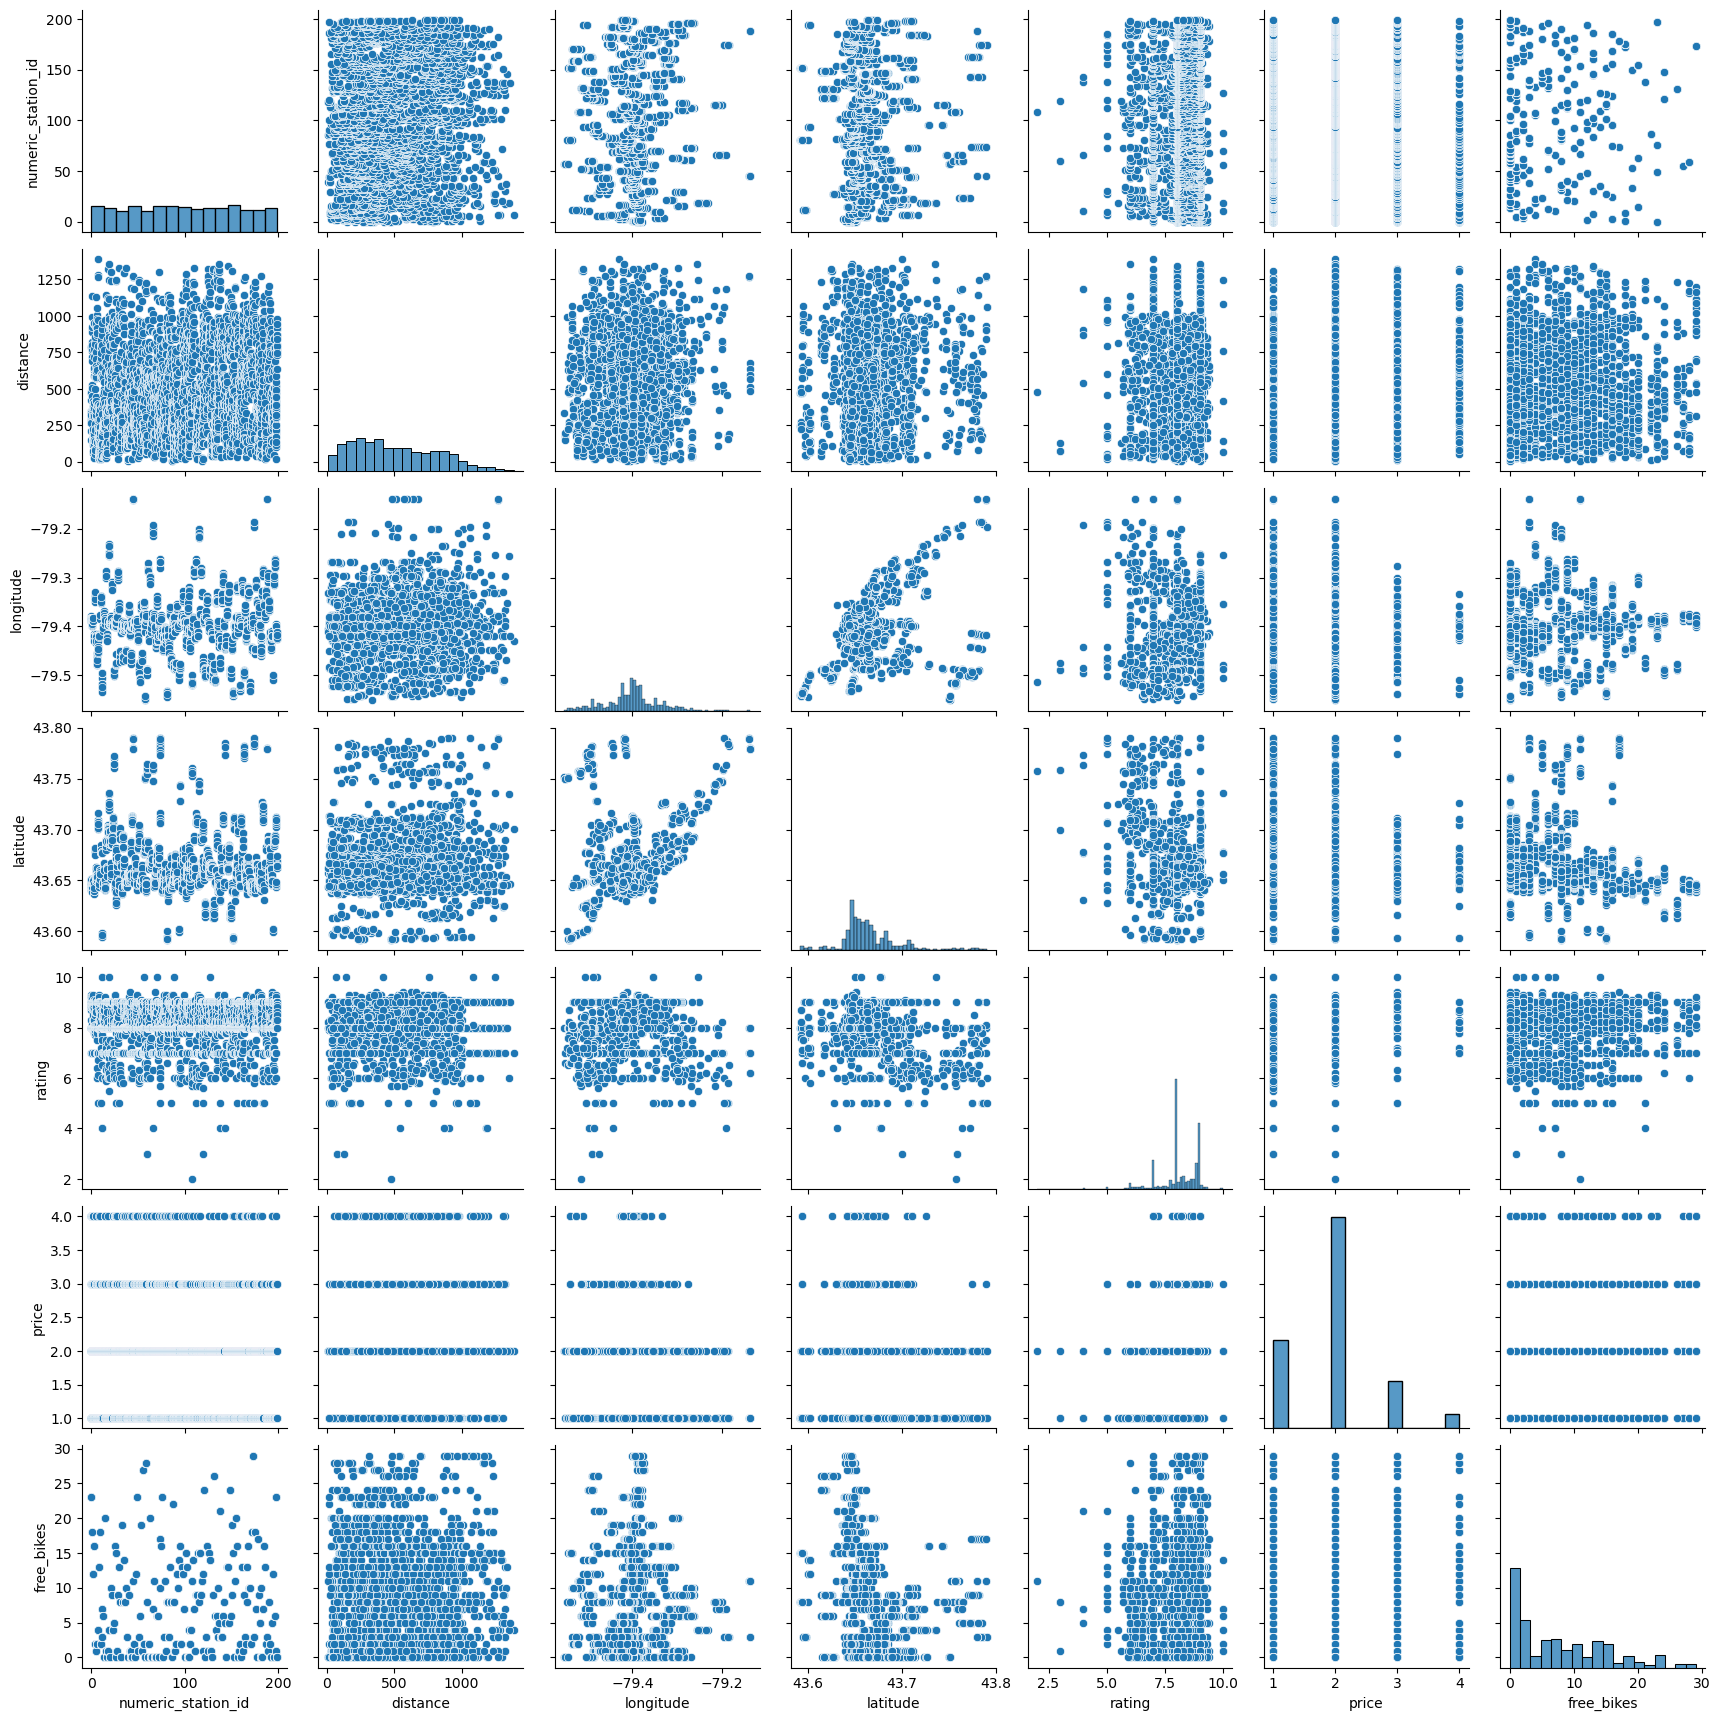

In [254]:
#pairplot to see if any patterns show up across any combination of variables. 
sns.pairplot(df[['nearby_bike_station_id', 'numeric_station_id', 'poi_id', 'name',
       'address', 'distance', 'longitude', 'latitude', 'categories', 'rating',
       'price', 'free_bikes']])

<Axes: >

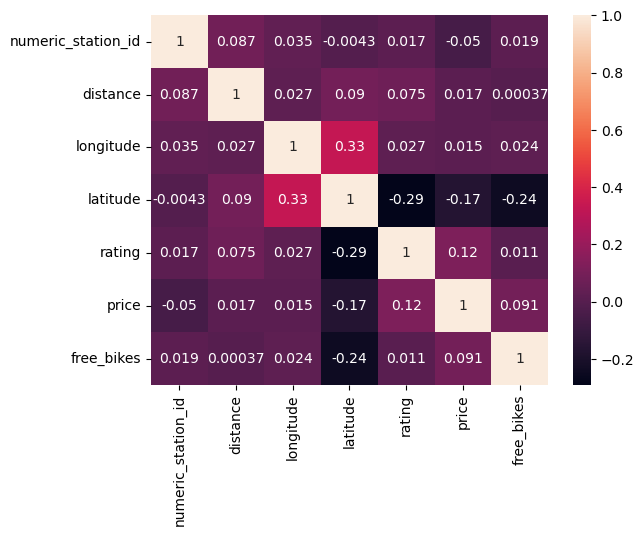

In [255]:
#checking correlation as well
c = df.loc[:,['numeric_station_id','distance','longitude','latitude','rating','price','free_bikes']].corr()
sns.heatmap(c, annot=True)

Create Histograms for Price, Rating, Distance

<Axes: xlabel='distance', ylabel='Count'>

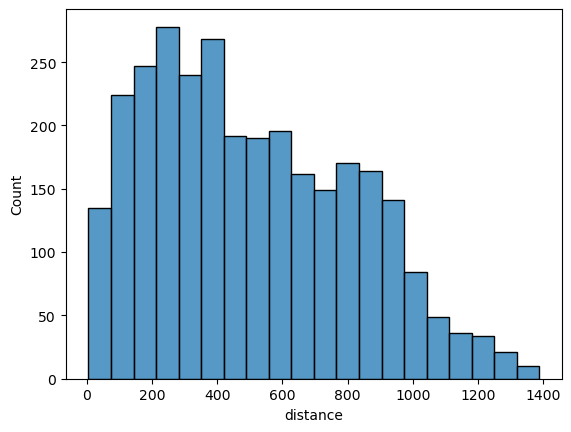

In [256]:
#histogram of distance in data_clean
sns.histplot(df['distance'])

<Axes: xlabel='price', ylabel='Count'>

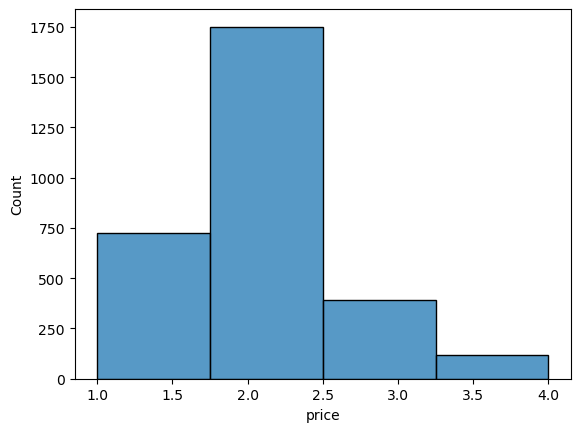

In [257]:
#histogram for price
sns.histplot(df['price'], bins=4)

<Axes: xlabel='rating', ylabel='Count'>

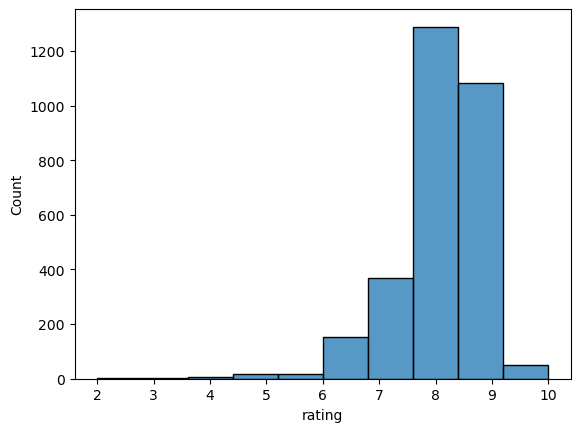

In [258]:
#histogram for ratings
sns.histplot(df['rating'], bins=10)

In [259]:
#plotting bike station coordinates and POI coordinates cenetered around downtown Toronto
import plotly.express as px

fig = px.scatter_geo(df, lat='latitude', lon='longitude', center={"lat":43.668044, "lon":-79.399319}, scope='north america')

fig.add_trace(
    px.scatter_geo(tor_stations, lat='latitude', lon='longitude', color_discrete_sequence=['red']).data[0]
)

fig.show()

In [84]:
#Isolating individual category names
#remove ''', '[',']' from categories
data_clean['categories'] = data_clean['categories'].str.replace("'", "", regex=False)
data_clean['categories'] = data_clean['categories'].str.replace("\[", "", regex=True)
data_clean['categories'] = data_clean['categories'].str.replace("\]", "", regex=True)

In [85]:
#split the categories column by
cat_list = data_clean['categories'].str.split(', ').tolist()

In [86]:
flattened_cat_list = [item for sublist in cat_list for item in sublist]
flattened_cat_list.sort()

In [87]:
#combinging some similar categories like pluralized variations into single categories. 
updated_cats = []

for i in flattened_cat_list:
    if i == 'Café'or i == 'Cafes':
        updated_cats.append('Cafe')
    elif 'Coffee' in i:
        updated_cats.append('Cafe')
    elif 'Cafe' in i:
        updated_cats.append('Cafe')
    elif 'Tea' in i:
        updated_cats.append('Cafe')
    elif i == 'Bars':
        updated_cats.append('Bar')
    elif 'Bar' in i:
        updated_cats.append('Bar')
    elif i == 'Restaurants':
        updated_cats.append('Restaurant')
    elif 'Restaurant' in i:
        updated_cats.append('Restaurant')
    else:
        updated_cats.append(i)

set(updated_cats)

{'Afghan',
 'African',
 'American',
 'Arabic',
 'Arcade',
 'Arcades',
 'Arts and Entertainment',
 'Asian Fusion',
 'BBQ Joint',
 'Bagel Shop',
 'Bagels',
 'Bakeries',
 'Bakery',
 'Bangladeshi',
 'Bar',
 'Beer',
 'Bistro',
 'Bistros',
 'Bookstores',
 'Brasserie',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'Breweries',
 'Brewery',
 'British',
 'Buffets',
 'Burger Joint',
 'Burgers',
 'Cafe',
 'Cajun/Creole',
 'Canadian (New)',
 'Cantonese',
 'Caribbean',
 'Caterers',
 'Cheese Shops',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Chocolatiers & Shops',
 'Cideries',
 'Colombian',
 'Comfort Food',
 'Convenience Stores',
 'Cuban',
 'Cupcake Shop',
 'Custom Cakes',
 'Deli',
 'Delis',
 'Dessert Shop',
 'Desserts',
 'Dim Sum',
 'Diner',
 'Diners',
 'Dinner Theater',
 'Do-It-Yourself Food',
 'Donuts',
 'Dumplings',
 'Egyptian',
 'Ethiopian',
 'Event Service',
 'Falafel',
 'Farmers Market',
 'Fast Food',
 'Filipino',
 'Fish & Chips',
 'Fish and Chips Shop',
 'Food Court',
 'Food and 

Text(0.5, 1.0, 'counts of main categories')

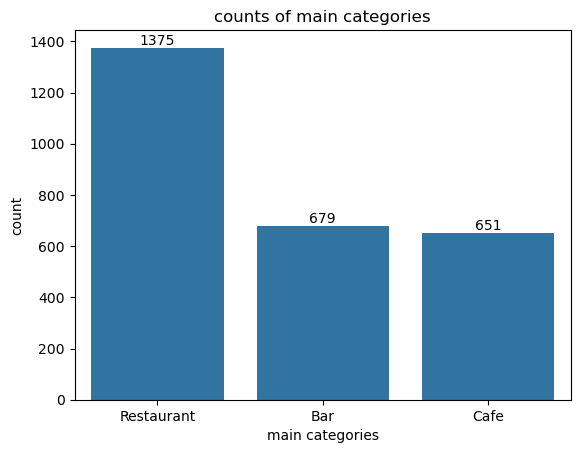

In [400]:
#Consolidating some sub categories for the sake of plotting. this is an incomplete data set but should still give a relative idea of the distribution of the most populat categories. 
df = pd.DataFrame({'categories': updated_cats})

X = df.loc[df['categories'].isin(['Restaurant', 'Bar','Library', 'Cafe', 'Park'])]

y = sns.countplot(x=X['categories'], data=X)

y.bar_label(y.containers[0])

plt.xlabel('main categories')
plt.ylabel('count')
plt.title('counts of main categories')

categories               
Restaurant                   1375
Bar                           679
Cafe                          651
Italian                       179
Canadian (New)                153
                             ... 
Public and Social Service       1
Organization                    1
Pool Hall                       1
Food Court                      1
Cideries                        1
Name: count, Length: 160, dtype: int64


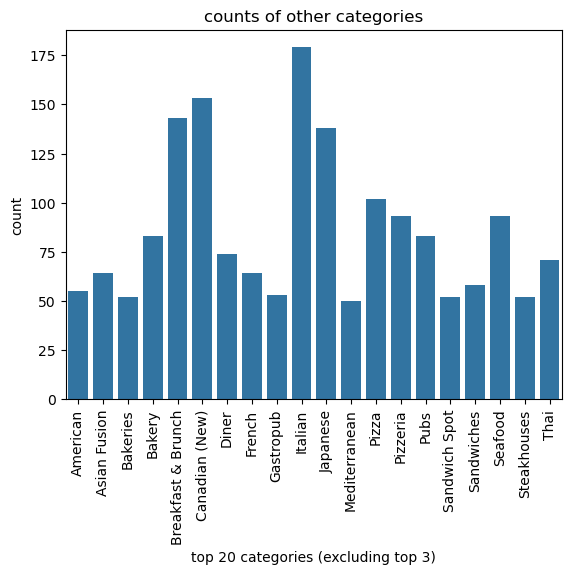

In [106]:
#using top N values as there are 157 different types NOT including the main ones. 
df = pd.DataFrame({'categories': updated_cats})

other_cats = df.loc[~df['categories'].isin(['Restaurant', 'Bar','Library', 'Cafe', 'Park'])]

top_cats = other_cats['categories'].value_counts().head(20).index

df_top_cats = other_cats[other_cats['categories'].isin(top_cats)]

sns.countplot(x=df_top_cats['categories'], data=df_top_cats)

plt.xlabel('top 20 categories (excluding top 3)')
plt.ylabel('count')
plt.title('counts of other categories')
plt.xticks(rotation=90)
#can see category counts in a table
print(df.value_counts())

In [152]:
data_clean[-15:].head()

,nearby bike station id,poi_id,name,address,distance,longitude,latitude,categories,rating,price,...,price_4,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
2976,f0af815a9e6c12bd0382843e03fd322f,5fc4397fdc8b462813985533,Pai Uptown,"2335 Yonge St, Toronto ON M4P 2C8",320.0,-79.398978,43.708515,Thai Restaurant,8.1,2,...,0,0,0,0,0,0,0,1,0,0
2977,f0af815a9e6c12bd0382843e03fd322f,51819802498ee3c6834b8e0b,De Mello Palheta Coffee Roasters,"2489 Yonge St (Erksine Ave), Toronto ON M4P 2H6",630.0,-79.399275,43.711877,"Café, Coffee Shop, Restaurant",8.6,2,...,0,0,0,0,0,0,0,0,1,0
2978,f0af815a9e6c12bd0382843e03fd322f,4aecffb0f964a520a3cc21e3,La Vecchia Ristorante,"2405A Yonge St (btwn Broadway & Erskine Ave.),...",470.0,-79.398862,43.710165,Italian Restaurant,8.2,4,...,1,0,0,0,0,0,0,1,0,0
2979,f0af815a9e6c12bd0382843e03fd322f,521e0c6c04939a8ad55d93d3,Fresh,"90 Eglinton Ave E (Yonge & Eglinton), Toronto ...",490.0,-79.395772,43.707525,Vegan and Vegetarian Restaurant,8.2,2,...,0,0,0,0,0,0,0,1,0,0
2980,f0af815a9e6c12bd0382843e03fd322f,5f47eddf704690529cef554e,Stock T.C,"2388 Yonge St, Toronto ON M4P 3J5",388.0,-79.399145,43.709302,"Café, Restaurant",8.0,1,...,0,0,0,0,0,0,0,1,0,0


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [92]:
#put data into a .csv now that it is all cleaned. 
data_clean.to_csv('data_clean.csv', index=False)
#save the categories as well, since a separate table was not created
df.to_csv('categories.csv', index=False)

In [109]:
import sqlite3
from sqlite3 import Error

In [110]:
#function for connecting to database
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [111]:
connection = create_connection("city_bikes_pois.sqlite")

Connection to SQLite DB successful


In [112]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [134]:
#create stations table
create_stations_table = """
CREATE TABLE IF NOT EXISTS stations (
    station_id TEXT PRIMARY KEY,
    numeric_station_id INTEGER,
    empty_slots INTEGER,
    free_bikes INTEGER,
    name TEXT,
    latitude REAL,
    longitude REAL,
    timestamp DATETIME
);
"""

In [147]:
#call executequery() to create stations table. pass in connection object and query string
execute_query(connection, create_stations_table)

Query executed successfully


In [187]:
#create POIs table
create_poi_table = """
CREATE TABLE IF NOT EXISTS points_of_interest (
    poi_id TEXT PRIMARY KEY,
    name TEXT,
    address TEXT,
    rating_actual REAL,
    price_actual INTEGER,
    categories TEXT,
    longitude REAL,
    latitude REAL
);
"""

In [198]:
#call function to create POI table.
execute_query(connection, create_poi_table)

Query executed successfully


In [121]:
#create rating table - poi ID, real rating, binary rating
create_rating_table = """
CREATE TABLE IF NOT EXISTS rating (
    poi_id TEXT,
    rating REAL,
    rating_1 INTEGER,
    rating_2 INTEGER,
    rating_3 INTEGER,
    rating_4 INTEGER,
    rating_5 INTEGER,
    rating_6 INTEGER,
    rating_7 INTEGER,
    rating_8 INTEGER,
    rating_9 INTEGER,
    rating_10 INTEGER,
    FOREIGN KEY (poi_id) REFERENCES points_of_interest(poi_id)
);
"""
    

In [122]:
execute_query(connection, create_rating_table)

Query executed successfully


In [209]:
#create price table
create_price_table = """
CREATE TABLE IF NOT EXISTS price (
    poi_id TEXT,
    price INTEGER,
    price_1	INTEGER,
    price_2 INTEGER,
    price_3 INTEGER,
    price_4 INTEGER,
    FOREIGN KEY (poi_id) REFERENCES points_of_interest(poi_id)
);
"""

In [210]:
execute_query(connection, create_price_table)

Query executed successfully


In [144]:
#categories table
create_categories_table = """
CREATE TABLE IF NOT EXISTS categories (
    category_id INTEGER PRIMARY KEY AUTOINCREMENT,
    category_name VARCHAR(50) NOT NULL
);
"""
    

In [145]:
execute_query(connection, create_categories_table)

Query executed successfully


In [132]:
#create table for POI categories
create_poi_categories_table = """
CREATE TABLE IF NOT EXISTS poi_categories(
    poi_id TEXT,
    category_id INTEGER,
    FOREIGN KEY (poi_id) REFERENCES points_of_interest(poi_id),
    FOREIGN KEY (category_id) REFERENCES categories(category_id)
);
    """

In [133]:
execute_query(connection, create_poi_categories_table)

Query executed successfully


In [135]:
#create distances table
create_station_poi_distances = """
    CREATE TABLE IF NOT EXISTS station_poi_distances (
    station_id TEXT,
    poi_id TEXT,
    distance REAL,
    FOREIGN KEY (station_id) REFERENCES stations(station_id),
    FOREIGN KEY (poi_id) REFERENCES points_of_interest(poi_id)
);
"""

In [136]:
execute_query(connection, create_station_poi_distances)

Query executed successfully


In [153]:
data_clean.to_sql('full_poi_data_set',connection, if_exists='replace', index=False)

2990

In [165]:
pd.DataFrame(updated_cats, columns=['categories'])

unique_categories = pd.DataFrame(updated_cats, columns=['categories'])['categories'].unique()
pd.DataFrame(unique_categories, columns=['categories']).to_sql('categories_raw', connection, if_exists='replace', index=False)

160

In [167]:
#add unique categories into categories table from categories_raw
insert_categories1 = """
    INSERT INTO categories (category_name)
    SELECT categories FROM categories_raw;
    """ 

In [168]:
execute_query(connection, insert_categories1)

Query executed successfully


In [190]:
insert_poi = """
    INSERT INTO points_of_interest (poi_id)
    SELECT DISTINCT poi_id FROM full_poi_data_set
"""

In [199]:
execute_query(connection, insert_poi)

Query executed successfully


In [206]:
#insert rest of POI data on a join
insert_poi2 = """
    INSERT INTO points_of_interest (poi_id, name, address, rating_actual, price_actual, categories, longitude, latitude)
    SELECT DISTINCT poi_id, name, address, rating, price, categories, longitude, latitude FROM full_poi_data_set;
"""

In [207]:
execute_query(connection, insert_poi2)

Query executed successfully


In [211]:
#insert price data query string
insert_price = """
    INSERT INTO price
    SELECT DISTINCT poi_id, price, price_1, price_2, price_3, price_4 FROM full_poi_data_set
"""

In [212]:
execute_query(connection, insert_price)

Query executed successfully


In [219]:
#query string to insert rating data
insert_rating = """
    INSERT INTO rating (poi_id, rating, rating_2, rating_3, rating_4, rating_5, rating_6, rating_7, rating_8, rating_9, rating_10)
    SELECT DISTINCT poi_id, rating, rating_2, rating_3, rating_4, rating_5, rating_6, rating_7, rating_8, rating_9, rating_10 FROM full_poi_data_set;
"""

In [220]:
execute_query(connection, insert_rating)

Query executed successfully


In [238]:
#insert distance data into distance column
insert_distances = """
    INSERT INTO station_poi_distances (station_id, poi_id, distance)
    SELECT nearby_bike_station_id, poi_id, distance FROM full_poi_data_set;
"""

In [239]:
execute_query(connection, insert_distances)

Query executed successfully


In [240]:
#add station dataset to SQL database in raw format. 
tor_stations_sample = pd.read_csv('tor_stations_sample.csv')
tor_stations_sample.head()

,empty_slots,free_bikes,id,latitude,longitude,name,timestamp
0,3,23,dcbcf9c681fbd3e77dfbea6df0e070bc,43.645857,-79.385365,Simcoe St / Wellington St W South,2023-11-17 15:55:45.502000-05:00
1,0,18,d1de2ddc0ea8a90d00ff717ad60a2f23,43.638497,-79.391920,Lower Spadina Ave / Lake Shore Blvd W,2023-11-17 15:55:44.622000-05:00
2,3,12,9fd381407b51a700753caec17607a127,43.647508,-79.386044,Simcoe St / King St W,2023-11-17 15:55:45.336000-05:00
3,3,16,f42363acf4af847ca6fcdbe9b48c8290,43.637981,-79.424146,Liberty St / Fraser Ave Green P,2023-11-17 15:55:45.472000-05:00
4,14,2,c4a01864ecb66e9b1ee3023d3205a281,43.680022,-79.340568,Langford Ave / Danforth Ave - SMART,2023-11-17 15:55:45.220000-05:00


In [241]:
tor_stations_sample.to_sql('tor_stations_raw', connection, if_exists='replace', index=False)

200

In [248]:
#insert tor stations data into 
insert_stations = """
    INSERT INTO stations (station_id, numeric_station_id, empty_slots, free_slots, name, latitude, longitude, timestamp)
    SELECT DISTINCT r.id, f.numeric_station_id, r.empty_slots, r.free_bikes, r.name, r.latitude, r.longitude, r.timestamp FROM tor_stations_raw AS r LEFT JOIN full_poi_data_set AS f ON r.id=f.nearby_bike_station_id
"""

In [249]:
execute_query(connection, insert_stations)

Query executed successfully


Look at the data before and after the join to validate your data.

Some topics to be covered if more time were spent:
- mapping category ids to the poi_categories column, and the points_of_interest table
- identifying sub-categories
- rounding distance values to 1-2 decimal places
- populating the 'rating_1' column in the rating table (no venues had a rating of 1/10 or 0.5/4)

No null values returned when querying tables other than "rating". See points above about populating rating_1. Outliers removed during data cleaning in python, and therefor does not require additional checks here. As primary keys were assigned to the specific columns, uniqueness was also confirmed as long as the tables accepted the INSERT INTO clauses. 